In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
dataset_original =  pd.read_csv("../datos/competencia_03.csv.gz")

In [39]:
#ipc_arg =  pd.read_excel("../datos/ipc_arg.xlsx")

In [40]:
#inflacao acumulada = ipc_nivel_general_nacional - ipc_nivel_general_nacional.shift(1)
#ipc_arg['inflacion_acumulada'] =  ipc_arg['ipc_nivel_general_nacional'].shift(1) - ipc_arg['ipc_nivel_general_nacional']
#ipc_arg['indice_tiempo'] = ipc_arg['indice_tiempo'].dt.strftime('%Y%m').astype(int)
#ipc_arg.rename(columns={'indice_tiempo':'foto_mes'}, inplace=True)
#ipc_arg


In [41]:
#data_teste = dataset_original.head(5)

In [42]:
#data_teste

In [43]:
# Mesclando o dataframe original com o dataframe ipc_arg com base na coluna 'ano_mes'
#merged_df = pd.merge(dataset_original, ipc_arg[['inflacion_acumulada', 'foto_mes']], how='left', on='foto_mes')

# Calculando 'mcomisiones_atualizado' com base na inflação acumulada
#merged_df['mcomisiones_atualizado'] = merged_df['mcomisiones'] * (1 + merged_df['inflacion_acumulada'])

# Dropando a coluna 'ano_mes' se você não precisar dela mais
#merged_df = merged_df.drop('foto_mes', axis=1)
#merged_df

In [84]:
#dataset = dataset_original.copy()
dataset = dataset_original[(dataset_original['foto_mes'] >= 201904) & (dataset_original['foto_mes'] <= 201909)]

In [85]:
dataset.set_index('foto_mes', inplace=True)

In [23]:
df_roto_zero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null.columns[df_roto_zero_null.eq(100).any()]].stack().reset_index()
df_roto_zero_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [86]:
df_roto_zero_bruto = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero = df_roto_zero_bruto[df_roto_zero_bruto.columns[df_roto_zero_bruto.eq(100).any()]].stack().reset_index()
df_roto_zero.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero = df_roto_zero[df_roto_zero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [12]:
df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
df_roto_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

C:\Users\maico\AppData\Local\Temp\ipykernel_4412\2256541971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')


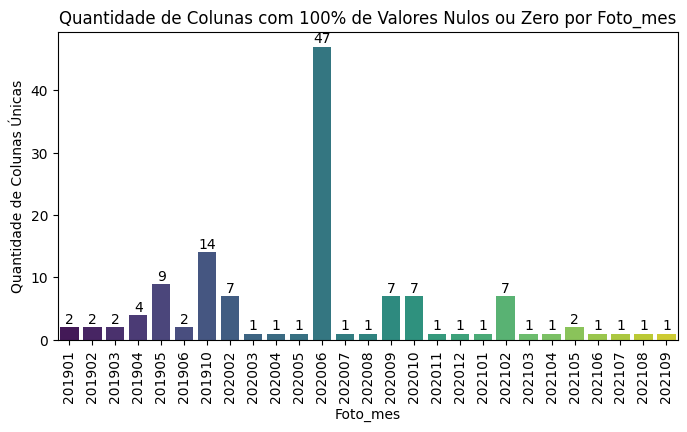

In [33]:
count_df_roto_zero_null = df_roto_zero_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Nulos ou Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_4412\3315999687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')


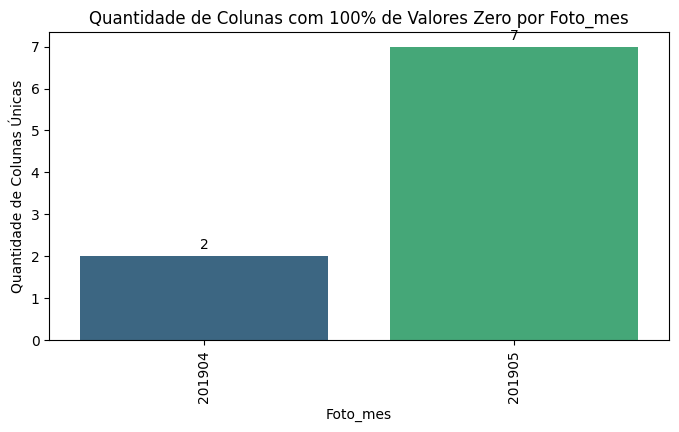

In [87]:
count_df_roto_zero = df_roto_zero.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [88]:
df_roto_zero

,foto_mes,coluna,porcentagem
5,201904,ctarjeta_visa_debitos_automaticos,100.0
6,201904,mttarjeta_visa_debitos_automaticos,100.0
9,201905,mrentabilidad,100.0
10,201905,mrentabilidad_annual,100.0
11,201905,mcomisiones,100.0
12,201905,mactivos_margen,100.0
13,201905,mpasivos_margen,100.0
16,201905,ccomisiones_otras,100.0
17,201905,mcomisiones_otras,100.0


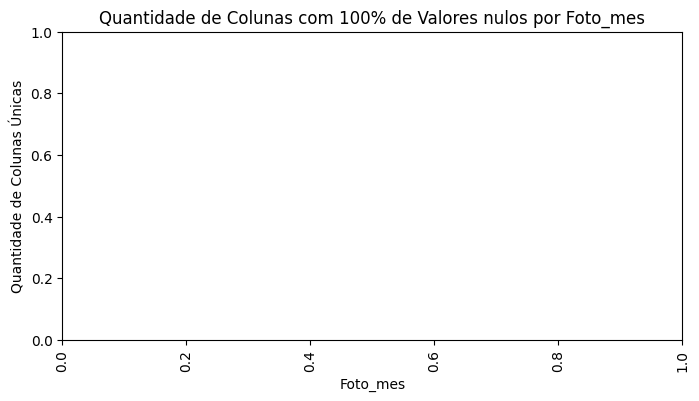

In [89]:
count_df_roto_null = df_roto_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [55]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

merged_df = pd.merge(count_df_roto_zero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_zero', '_null'))
merged_df = merged_df.fillna(0)
merged_df['quantidade_colunas'] =  merged_df['quantidade_colunas_zero'] - merged_df['quantidade_colunas_null']


C:\Users\maico\AppData\Local\Temp\ipykernel_94044\2532655015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')


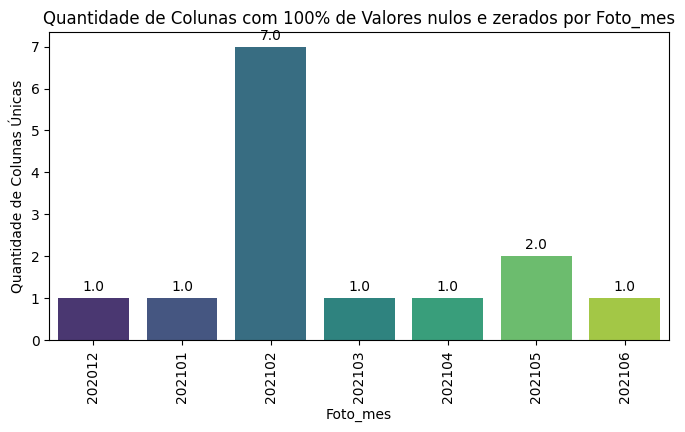

In [56]:

plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos e zerados por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(merged_df['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [90]:
df_parcial_zero = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_parcial_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)

In [91]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)
filtered_columns

numero_de_cliente          False
active_quarter             False
cliente_vip                False
internet                   False
cliente_edad               False
                           ...  
Visa_mconsumototal         False
Visa_cconsumos             False
Visa_cadelantosefectivo    False
Visa_mpagominimo           False
clase_ternaria             False
Length: 154, dtype: bool

In [92]:
df_parcial_zero_filtered = df_parcial_zero.loc[:, filtered_columns]
df_parcial_null_filtered = df_parcial_null.loc[:, filtered_columns]

In [93]:
df_parcial_zero_filtered

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ccomisiones_otras,mcomisiones_otras,tmobile_app,cmobile_app_trx
foto_mes,,,,,,,,,,,
201904,0.25,0.22,2.53,4.06,1.22,100.00,100.00,2.53,2.53,0.00,0.00
201905,100.00,100.00,100.00,100.00,100.00,33.25,33.25,100.00,100.00,0.00,0.00
201906,0.24,0.21,2.75,3.81,1.13,33.32,33.32,2.75,2.75,0.00,0.00
201907,0.26,0.23,2.58,4.39,1.07,32.98,32.98,2.58,2.58,46.88,47.23
201908,0.29,0.25,2.77,4.48,1.34,33.34,33.34,2.77,2.77,45.92,46.12
201909,0.31,0.27,3.38,4.22,1.06,33.56,33.56,3.38,3.38,45.49,45.82


In [94]:
df_parcial_null_filtered

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ccomisiones_otras,mcomisiones_otras,tmobile_app,cmobile_app_trx
foto_mes,,,,,,,,,,,
201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
201905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
201906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
201907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
bool_index = df_parcial_zero_filtered.index.isin(df_parcial_null_filtered.index)


In [122]:
bool_index

array([ True,  True,  True,  True,  True,  True,  True])

In [130]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)


In [147]:
filtered_columns_true = filtered_columns[filtered_columns == True].index

In [148]:
filtered_columns_true

Index(['ccajeros_propios_descuentos', 'mcajeros_propios_descuentos',
       'ctarjeta_visa_descuentos', 'mtarjeta_visa_descuentos',
       'ctarjeta_master_descuentos', 'mtarjeta_master_descuentos',
       'ccajas_depositos', 'Master_madelantodolares', 'Visa_madelantodolares'],
      dtype='object')

In [151]:
df_parcial_zero[filtered_columns_true].stack().reset_index(name='quantidade_zero')

,foto_mes,level_1,quantidade_zero
0,202012,ccajeros_propios_descuentos,94.42
1,202012,mcajeros_propios_descuentos,96.23
2,202012,ctarjeta_visa_descuentos,93.48
3,202012,mtarjeta_visa_descuentos,93.73
4,202012,ctarjeta_master_descuentos,96.11
...,...,...,...
58,202106,ctarjeta_master_descuentos,95.60
59,202106,mtarjeta_master_descuentos,96.01
60,202106,ccajas_depositos,99.48
61,202106,Master_madelantodolares,41.85


In [152]:
df_parcial_null[filtered_columns_true].stack().reset_index(name='quantidade_null')

,foto_mes,level_1,quantidade_null
0,202012,ccajeros_propios_descuentos,0.00
1,202012,mcajeros_propios_descuentos,0.00
2,202012,ctarjeta_visa_descuentos,0.00
3,202012,mtarjeta_visa_descuentos,1.36
4,202012,ctarjeta_master_descuentos,0.00
...,...,...,...
58,202106,ctarjeta_master_descuentos,0.00
59,202106,mtarjeta_master_descuentos,2.56
60,202106,ccajas_depositos,0.00
61,202106,Master_madelantodolares,58.15


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você tenha df_parcial_zero e df_parcial_null disponíveis

# Filtrar colunas onde a soma das porcentagens de valores zero e nulos é igual a 100
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)

# Selecionar apenas as colunas relevantes
df_parcial_zero_filtered = df_parcial_zero[filtered_columns_true].stack().reset_index(name='quantidade_zero')
df_parcial_null_filtered = df_parcial_null[filtered_columns_true].stack().reset_index(name='quantidade_null')

# Mesclar os dois dataframes
df_merged = pd.merge(df_parcial_zero_filtered, df_parcial_null_filtered, on=['foto_mes', 'level_1'])
df_merged = df_merged[(df_merged['quantidade_zero'] + df_merged['quantidade_null']) == 100]


In [171]:
df_merged

,foto_mes,level_1,quantidade_zero,quantidade_null
7,202012,Master_madelantodolares,39.09,60.91
18,202102,ccajeros_propios_descuentos,100.00,0.00
19,202102,mcajeros_propios_descuentos,100.00,0.00
20,202102,ctarjeta_visa_descuentos,100.00,0.00
21,202102,mtarjeta_visa_descuentos,100.00,0.00
22,202102,ctarjeta_master_descuentos,100.00,0.00
23,202102,mtarjeta_master_descuentos,100.00,0.00
25,202102,Master_madelantodolares,40.20,59.80
34,202103,Master_madelantodolares,40.41,59.59
43,202104,Master_madelantodolares,40.49,59.51


9

In [98]:
colunas_imputar = df_roto_zero['coluna'].unique()

In [101]:
#passar colunas com zero para na
dataset[colunas_imputar] = dataset[colunas_imputar].replace(0, np.nan)

C:\Users\maico\AppData\Local\Temp\ipykernel_4412\439258706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[colunas_imputar] = dataset[colunas_imputar].replace(0, np.nan)


In [102]:
dataset[colunas_imputar].isna().sum()   

ctarjeta_visa_debitos_automaticos     344890
mttarjeta_visa_debitos_automaticos    344890
mrentabilidad                         129461
mrentabilidad_annual                  129231
mcomisiones                           146028
mactivos_margen                       155093
mpasivos_margen                       135290
ccomisiones_otras                     146015
mcomisiones_otras                     146029
dtype: int64

In [104]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [108]:
dataset_original[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras
count,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000
mean,2.373,5461.627,2278.755,25661.771,1141.793,-617.412,1586.546,8.248,1148.173
std,3.200,11103.566,7067.582,60974.377,2799.223,3351.625,4560.329,7.421,2822.936
min,0.000,0.000,-1948808.830,-1862286.080,-1953482.100,-555339.210,-125969.940,0.000,-1953482.100
25%,0.000,0.000,0.000,2872.870,148.850,-1126.320,150.900,4.000,149.350
50%,1.000,1149.540,1149.410,14039.100,613.100,-214.760,614.850,8.000,615.170
75%,3.000,6269.270,2782.950,30420.625,1512.120,0.000,1563.990,11.000,1516.650
max,75.000,769131.930,2599540.050,11161405.720,1959169.310,568198.100,1799988.850,292.000,1959169.310


In [109]:
dataset[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras
count,436466.000,436466.000,651895.000,652125.000,635328.000,626263.000,646066.000,635341.000,635327.000
mean,3.753,6661.165,3238.963,33448.814,1055.549,-433.542,2321.449,9.846,1062.419
std,3.258,9568.829,7160.108,59823.684,2296.871,2128.645,5297.085,7.055,2324.180
min,1.000,0.010,-202220.120,-1858705.730,-54072.560,-181435.160,-28681.220,1.000,-53983.240
25%,1.000,1251.590,761.300,10724.560,223.988,-875.170,404.010,6.000,224.410
50%,3.000,3589.980,1680.770,19264.880,672.160,-256.760,1034.325,9.000,674.390
75%,5.000,8111.408,3413.155,35187.370,1330.960,31.940,2341.758,12.000,1334.090
max,55.000,577457.570,894482.140,6246624.680,322021.440,400016.110,667148.640,182.000,322021.440


In [112]:
#dataset sem periodo zerado 
dataset_original[colunas_imputar][(dataset_original['foto_mes'] >= 201904) & (dataset_original['foto_mes'] <= 201909)].describe()


,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras
count,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000
mean,2.097,3720.931,2702.307,27916.606,858.277,-347.487,1919.495,8.006,863.862
std,3.066,7879.545,6650.039,56048.119,2111.626,1913.541,4896.150,7.430,2136.302
min,0.000,0.000,-202220.120,-1858705.730,-54072.560,-181435.160,-28681.220,0.000,-53983.240
25%,0.000,0.000,112.440,5320.130,42.120,-670.260,99.010,4.000,42.150
50%,1.000,375.360,1291.600,15565.875,418.710,-77.020,735.810,8.000,419.610
75%,3.000,4211.970,2893.020,30490.130,1166.880,0.000,1934.983,12.000,1169.875
max,55.000,577457.570,894482.140,6246624.680,322021.440,400016.110,667148.640,182.000,322021.440


* ctarjeta_visa_debitos_automaticos	--	Cantidad de débitos automáticos debitados durante el mes en las tarjeta de crédito VISA
* mtarjeta_visa_debitos_automaticos	pesos	Monto total de  débitos automáticos debitados durante el mes en la tarjeta de crédito VISA . Todo está convertido a pesos argentinos, al valor de la fecha de cierre del utlimo dia habil del mes.
* mrentabilidad	pesos	Ganancia total que ha obtenido el banco de ese cliente, en ese mes.
* mrentabilidad_annual	pesos	Ganancia total que el banco ha obtenido de ese cliente en el ultimo año de relacion cliente-banco,  o meses desde que ingresó si es cliente reciente.
* mcomisiones	pesos	Monto total de las comisiones que ha ganado el banco por ese cliente.
* mactivos_margen	pesos	Monto total de la ganancia que el banco ha obtenido en concepto de intereses que ha cobrado al cliente.
* mpasivos_margen	pesos	Monto total de la ganancia que el banco ha obtenido por el dinero/inversiones que el cliente tiene en el banco.
* ccomisiones_otras	--	Cantidad de otras comisiones que se cobraron al cliente durante el mes.
* mcomisiones_otras	pesos	Monto total en pesos de otras comisiones que se cobraron al cliente durante el mes.


In [207]:
dataset_inputar = dataset_original[(dataset_original['foto_mes'] >= 201904) & (dataset_original['foto_mes'] <= 201909)]

In [195]:
dataset_inputar[colunas_imputar].isna().sum()

ctarjeta_visa_debitos_automaticos     0
mttarjeta_visa_debitos_automaticos    0
mrentabilidad                         0
mrentabilidad_annual                  0
mcomisiones                           0
mactivos_margen                       0
mpasivos_margen                       0
ccomisiones_otras                     0
mcomisiones_otras                     0
dtype: int64

In [208]:
dataset_inputar[colunas_imputar] = dataset_inputar[colunas_imputar].replace(0, np.nan)

C:\Users\maico\AppData\Local\Temp\ipykernel_4412\151757495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_inputar[colunas_imputar] = dataset_inputar[colunas_imputar].replace(0, np.nan)


In [203]:
np.append(['foto_mes', 'numero_de_cliente'], colunas_imputar)

array(['foto_mes', 'numero_de_cliente',
       'ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       'mpasivos_margen', 'ccomisiones_otras', 'mcomisiones_otras'],
      dtype=object)

In [209]:
dataset_inputar = dataset_inputar[np.append(['foto_mes', 'numero_de_cliente'], colunas_imputar)]

In [211]:
dataset_inputar

,foto_mes,numero_de_cliente,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras
244824,201906,112470962,2.000,393.810,182.960,21076.660,153.550,-322.040,347.110,8.000,153.550
244825,201906,112471475,NaN,NaN,138.050,6498.850,226.520,-294.200,218.770,10.000,226.520
244826,201906,112473055,NaN,NaN,13212.770,131708.120,240.450,NaN,11059.100,6.000,240.450
244827,201906,112474259,3.000,3542.460,2503.170,31616.530,1118.290,182.910,997.720,6.000,1118.290
244828,201906,112474489,NaN,NaN,835.250,946.840,830.900,0.580,3.130,2.000,830.900
...,...,...,...,...,...,...,...,...,...,...,...
4870741,201904,127675174,NaN,NaN,6977.490,67127.360,3787.680,-472.880,3192.240,10.000,3787.680
4870742,201904,126355597,NaN,NaN,1534.090,13787.260,1048.590,-50.750,464.650,10.000,1048.590
4870743,201904,126368424,NaN,NaN,4110.400,26091.210,420.250,-146.920,3292.830,8.000,420.250
4870744,201904,126740458,NaN,NaN,631.700,7453.920,193.290,127.690,246.060,14.000,193.290


In [215]:
dataset_inputar[dataset_inputar['numero_de_cliente'] == 112471475].isna().sum()

foto_mes                              0
numero_de_cliente                     0
ctarjeta_visa_debitos_automaticos     6
mttarjeta_visa_debitos_automaticos    6
mrentabilidad                         1
mrentabilidad_annual                  1
mcomisiones                           1
mactivos_margen                       1
mpasivos_margen                       1
ccomisiones_otras                     1
mcomisiones_otras                     1
dtype: int64